In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#1

In [20]:
data = pd.read_csv("data_square.csv")

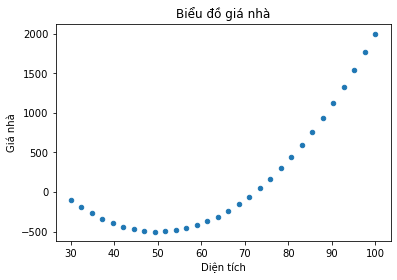

In [26]:
plo = data.plot.scatter(x='Diện tích', y='Giá nhà').set_title('Biểu đồ giá nhà')

In [27]:
class LinearModel:
    def __init__(self, data, x, y):
        self.data = data
        a = np.array([1]*len(data)) # array of 1s
        self.x = np.array([a, data[x],  np.power(data[x], 2)]).transpose()
        self.t = y
        xtx = (self.x).transpose().dot(self.x)
        self.model = np.linalg.inv(xtx).dot(self.x.transpose()).dot(data[y])
        
    def __repr__(self) -> str:
        return f"{self.model[0]:.3f} + {self.model[1]:.3f}x + {self.model[2]:.3f}x^2" 

    def predict(self, x):
        return self.model[0] + self.model[1] * x
    
    def plot(self, x, y):
        values = np.linspace(self.data[x].min(), self.data[x].max(), 100)
        plt.scatter(self.data[x], self.data[y])
        plt.xlabel = "mét vuông"
        plt.ylabel = "giá"
        plt.plot(values, self.model[0] + self.model[1] * values + self.model[2] * np.power(values, 2), color = "red")
        plt.show()

In [28]:
bai1 = LinearModel(data, "Diện tích", "Giá nhà")
print(bai1)

2000.006 + -100.000x + 1.000x^2


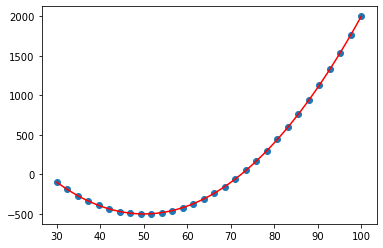

In [29]:
bai1.plot("Diện tích", "Giá nhà")

In [ ]:
#2

In [31]:
class LinearRegression:
    def __init__(self, degree=1):
        self._k = degree
    
    def create_poly(self, X): 
        fmap = np.empty([X.shape[0], self._k + 1])
        for i in range(self._k + 1):
            fmap[:, i] = X[:, 1] ** i
        return fmap
    
    def transform(self, X, y):
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        self._X = np.hstack((np.ones((X.shape[0], 1)), X))
        self._X = self.create_poly(self._X)
        
        self._y = np.array(y).reshape(-1, 1)
    
    def fit(self, X, y):
        self.transform(X, y)
        self._W = np.linalg.solve(self._X.T.dot(self._X), self._X.T.dot(self._y))
        
    def ridge_fit(self, X, y, alpha=1.0):
        self.transform(X, y)
        self._alpha = alpha
        eye = np.eye(self._X.shape[1])
        self._W = np.linalg.solve(self._X.T.dot(self._X) + self._alpha * eye, self._X.T.dot(self._y))
        
    def lasso_fit(self, X, y, alpha=1.0, learning_rate=0.01, max_ite=1000):
        self._alpha = alpha
        self._lrate = learning_rate
        self.transform(X, y)
        self._W = np.zeros(self._X.shape[1])
        for i in range(max_ite):
            self.update_w()
    
    def update_w(self):
        
        y_pred = np.matmul(self._X, self._W).reshape(-1, 1)
  
        dW = np.zeros(self._X.shape[1])
        for j in range(self._X.shape[1]):
            if self._W[j] > 0:
                dW[j] = (-2 * (self._X[:, j]).dot(self._y - y_pred) + self._alpha) / self._X.shape[0]
            else:
                dW[j] = (-2 * (self._X[:, j]).dot(self._y - y_pred) - self._alpha) / self._X.shape[0]

        self._W -= self._lrate * dW
                
    def coef(self):
     
        return self._W
    
    def predict(self, x_new):
        if x_new.ndim == 1:
            x_new = x_new.reshape(-1, 1)
        x_new = np.hstack((np.ones((x_new.shape[0], 1)), x_new))
        x_new = self.create_poly(x_new)
        return np.matmul(x_new, self._W)

In [7]:
def generate_data(func, size, std):
    x = np.linspace(0, 1, size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t



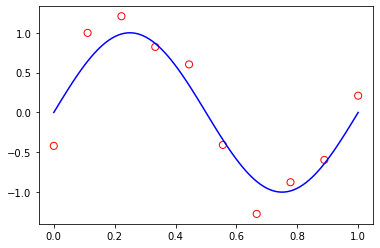

In [8]:
def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = generate_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="r", s=50)
plt.plot(x_test, y_test, c="b")
plt.show()

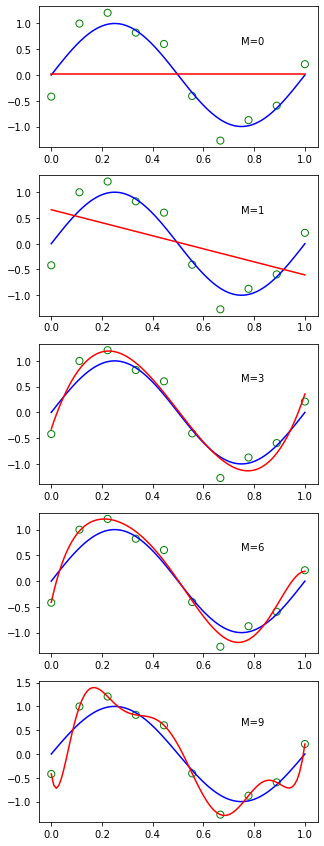

In [12]:
#2a
fig, ax = plt.subplots(5, 1, figsize = (5, 15))

for i, k in enumerate([0, 1, 3, 6, 9]):
    m = LinearRegression(k)
    m.fit(x_train, y_train)
    
    y_pred = m.predict(x_test)
    
    ax[i].scatter(x_train, y_train, facecolor="none", edgecolor="g", s=50)
    ax[i].plot(x_test, y_test, c="b")
    ax[i].plot(x_test, y_pred, c="r")
    ax[i].annotate("M={}".format(k), xy=(0.75, 0.6))
    
plt.show()


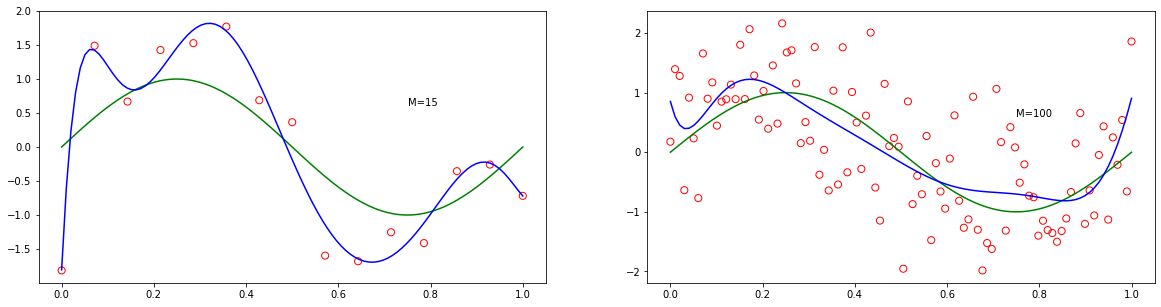

In [17]:
#2b
fig, ax = plt.subplots(1, 2, figsize=(20,5))

for i, size in enumerate([15, 100]):
    x_train2, y_train2 = generate_data(func, size, 0.75)
    m2 = LinearRegression(9)
    m2.fit(x_train2, y_train2)
    
    y_pred2 = m2.predict(x_test)
    
    ax[i].scatter(x_train2, y_train2, facecolor="none", edgecolor="r", s=50)
    ax[i].plot(x_test, y_test, c="g")
    ax[i].plot(x_test, y_pred2, c="b")
    ax[i].annotate("M={}".format(size), xy=(0.75, 0.6))
    
plt.show()

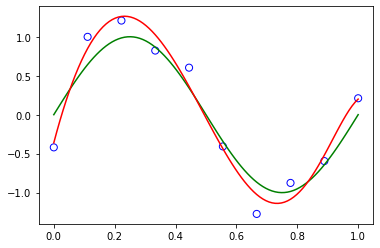

In [32]:
#2c
ridge = LinearRegression(9)
ridge.ridge_fit(x_train, y_train, 1e-5)

y_pred_r = ridge.predict(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50)
plt.plot(x_test, y_test, c="g")
plt.plot(x_test, y_pred_r, c="r")
plt.show()

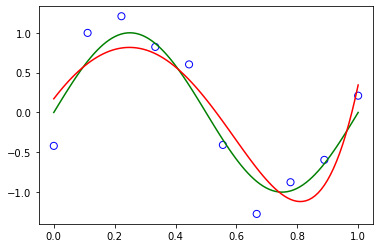

In [33]:

lasso = LinearRegression(9)
lasso.lasso_fit(x_train, y_train, 1e-5, 0.1, 10000)

y_pred_r = lasso.predict(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50)
plt.plot(x_test, y_test, c="g")
plt.plot(x_test, y_pred_r, c="r")
plt.show()